## Thực Hành 3: BIẾN ĐỔI HÌNH HỌC

### 1. VIẾT CHƯƠNG TRÌNH BIẾN ĐỔI ẢNH


##### 1.1. Chọn đối tượng trong ảnh

(1427, 2100, 3)


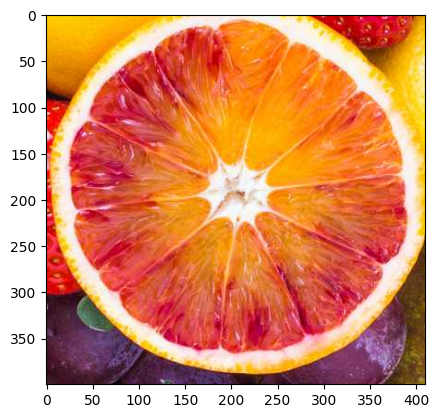

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread("fruit.jpg")
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave("orange.jpg", bmg)
plt.imshow(bmg)
plt.show()

##### 1.2 Tịnh tiến đơn


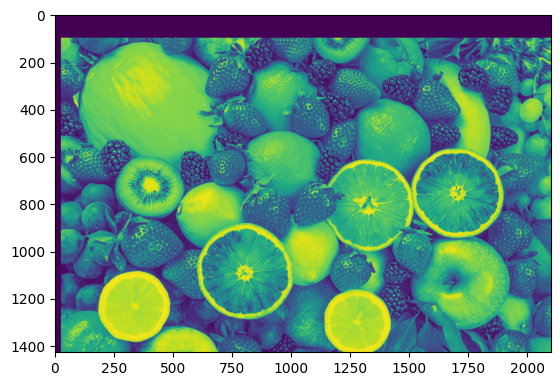

In [10]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread("fruit.jpg", mode = "F")
bdata = nd.shift(data,(100,25))

plt.imshow(bdata)
plt.show()

##### 1.3. Thay đổi kích thước ảnh

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


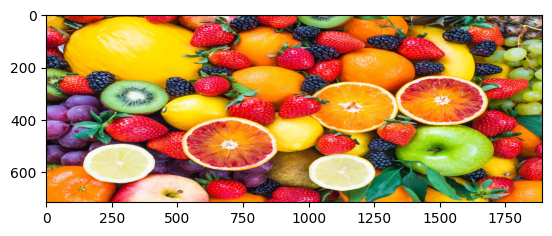

In [11]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread("fruit.jpg")
print(data.shape)
bdata = nd.zoom(data,2)
print(bdata.shape)
bdata2 = nd.zoom(data, (2, 2, 1))
print(bdata2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()

##### 1.4. Xoay ảnh

(1427, 2100)


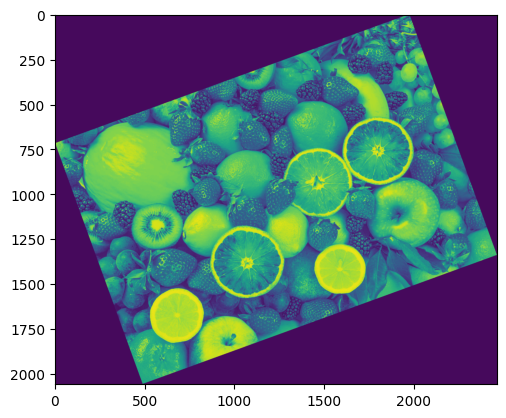

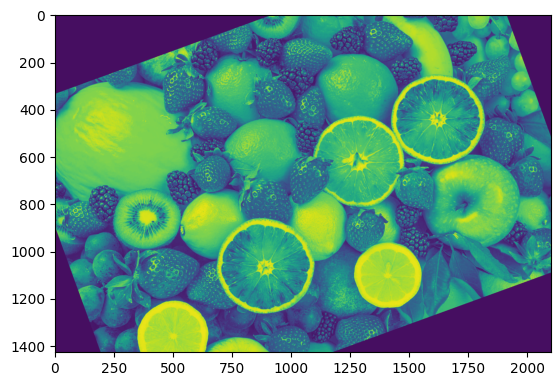

In [12]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread("fruit.jpg", mode = "F")
print(data.shape)
d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()

##### 1.5. Dilation và Erosion

(309, 515)


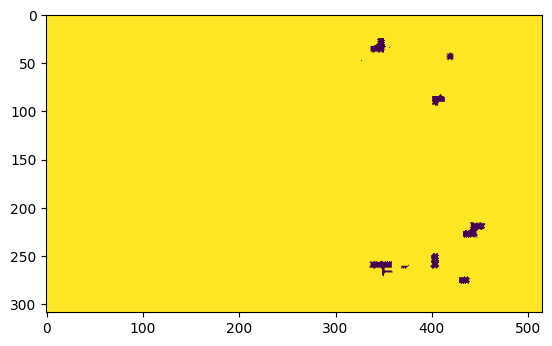

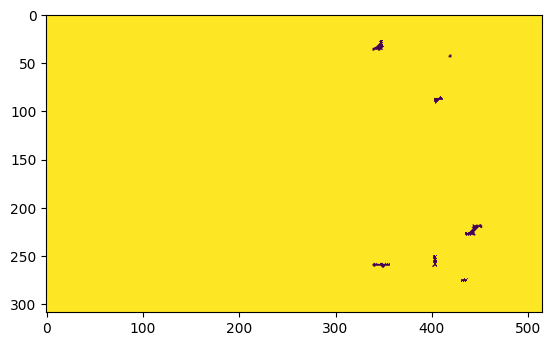

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread("world_cup.jpg", mode = "L")
print(data.shape)

d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()

##### 1.6. Coordinate Mapping

(309, 515)


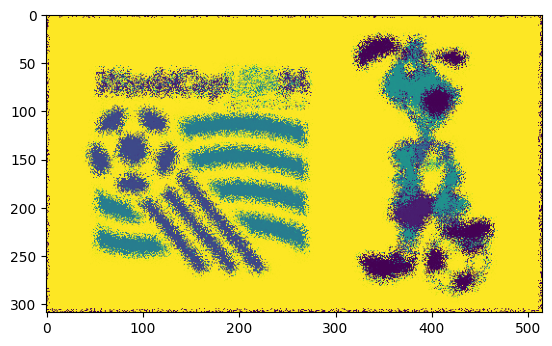

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread("world_cup.jpg", mode = "F")
print(data.shape)
V, H = data.shape

M = np.indices((V, H))

d = 5 
q = 2 * d * np.random.rand(*M.shape) - d

mp = (M + q).astype(int)
d1 = nd.map_coordinates(data, mp)
plt.imshow(d1)
plt.show()

##### 1.7. Biến đổi chung(Generic Tranformation)



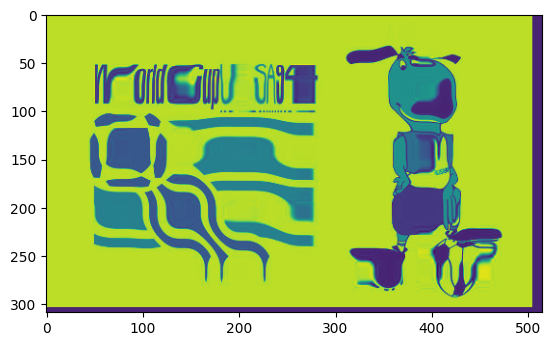

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1] / 10.0) + outcoord[1]
    return a, b

data = iio.imread("world_cup.jpg", mode = "F")

d1 = nd.geometric_transform(data, GeoFun)

plt.imshow(d1)
plt.show()

### 2. BÀI TẬP

##### 1. Chọn ảnh quả kiwi bất kì .Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới. Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin. Lưu ảnh kết quả vào file kiwi_wave.jpg

(1414, 2119, 3)


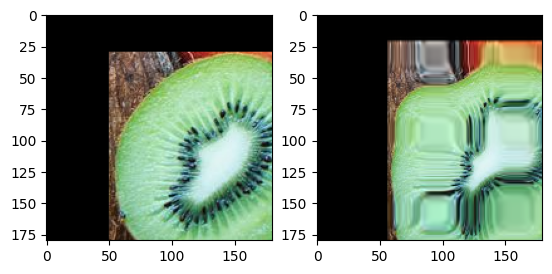

In [ ]:
import numpy as np 
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def GeoFun(outcoord):
    a = 10 * np.sin(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.sin(outcoord[1] / 10.0) + outcoord[1]
    return a, b

data = iio.imread("exercise/colorful-ripe-tropical-fruits.jpg")
bmg = data[920:1100, 390:570]
bdata = nd.shift(bmg, (30, 50, 0))
d1 = np.stack([nd.geometric_transform(bdata[:, :, i], GeoFun) for i in range(3)], axis=2)

iio.imsave("kiwi_wave.jpg", d1.astype(np.uint8))

print(data.shape)
iio.imsave("kiwi.jpg", bdata)
plt.subplot(1, 2, 1)
plt.imshow(bdata)
plt.subplot(1, 2, 2)
plt.imshow(d1)
plt.show()


##### 2. Chọn quả đu đủ và dưa hấu từ google. Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím. Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.


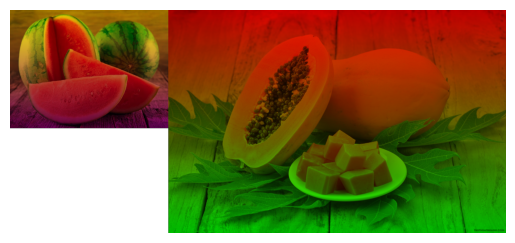

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt


data = iio.imread("dudu.jpg")
data1 = iio.imread("duahau.jpg")

def doi_mau(img, mau1, mau2):
    h = img.shape[0]
    ti_le = np.linspace(0, 1, h).reshape(h, 1, 1)
    mau1 = np.array(mau1).reshape(1, 1, 3)
    mau2 = np.array(mau2).reshape(1, 1, 3)
    mau_moi = mau1 + (mau2 - mau1) * ti_le
    return (img / 255 * mau_moi).astype(np.uint8)

data_n = doi_mau(data, [255, 0, 0], [0, 255, 0])
data1_n = doi_mau(data1, [255, 255, 0], [128, 0, 128])

h = max(data.shape[0], data1.shape[0])
w = data.shape[1] + data1.shape[1]
kq = np.zeros((h, w, 4), dtype=np.uint8)


kq[0:data1.shape[0], 0:data1.shape[1], :3] = data1_n
kq[0:data1.shape[0], 0:data1.shape[1], 3] = 255

x = data1.shape[1]
kq[0:data.shape[0], x:x+data.shape[1], :3] = data_n
kq[0:data.shape[0], x:x+data.shape[1], 3] = 255

iio.imwrite("kq.png", kq)
plt.imshow(kq)
plt.axis("off")
plt.show()


#### 3. Chọn ảnh núi và thuyền . Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False). Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay. Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

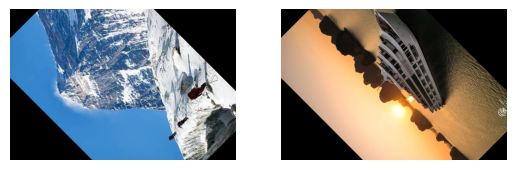

In [57]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd

data = iio.imread("mountain.jpg")
data1 = iio.imread("boat.jpg")

data = nd.rotate(data, 45, reshape=False)
data1 = nd.rotate(data1, 45, reshape=False)

data = np.flipud(data)
data1 = np.flipud(data1)

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(data1)
plt.axis('off')

plt.savefig("mountain_boat_mirror.jpg")
plt.show()


#### 4. Chọn ngôi chùa bất kì. Phóng to ngôi chùa lên 5 lần. Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa. Lưu ảnh kết quả vào pagoda_warped.jpg.

Kích thước gốc: (348, 600, 3)
Kích thước sau khi phóng to: (1740, 3000, 3)


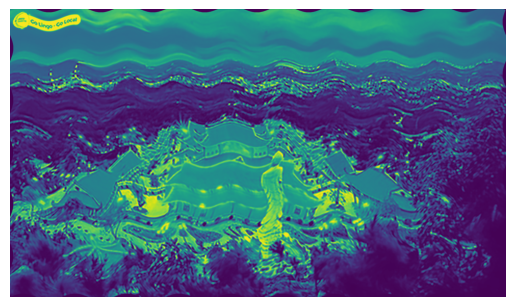

In [3]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def warp_function(output_coords):
    y, x = output_coords
    new_y = y + 20 * np.sin(x / 50.0)
    new_x = x + 20 * np.sin(y / 50.0)
    return new_y, new_x

data = iio.imread("pagoda.jpg")
print("Kích thước gốc:", data.shape)
z_data = nd.zoom(data, (5, 5, 1))
print("Kích thước sau khi phóng to:", z_data.shape)
gray = np.mean(z_data, axis=2)
warped = nd.geometric_transform(gray, warp_function)
plt.imshow(warped)
plt.axis('off')
plt.show()
iio.imsave("pagoda_warped.jpg", warped.astype(np.uint8))

#### 5. Tạo một chương trình menu tương tác cho phép người dùng chọn các phép biến đổi sau:
- Tịnh tiến (hỏi số pixel di chuyển theo x và y).
- Xoay (hỏi góc xoay và chọn reshape=True/False).
- Phóng to/thu nhỏ (hỏi hệ số zoom).
- Làm mờ Gaussian (hỏi giá trị sigma).
- Biến đổi sóng (hỏi biên độ sóng).
- Người dùng chọn ảnh từ 3 ảnh bất kì

Chọn ảnh để xử lý:
1. boat.jpg
2. world_cup.jpg
3. mountain.jpg



Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to / Thu nhỏ
4. Làm mờ
5. Biến đổi sóng
0. Thoát


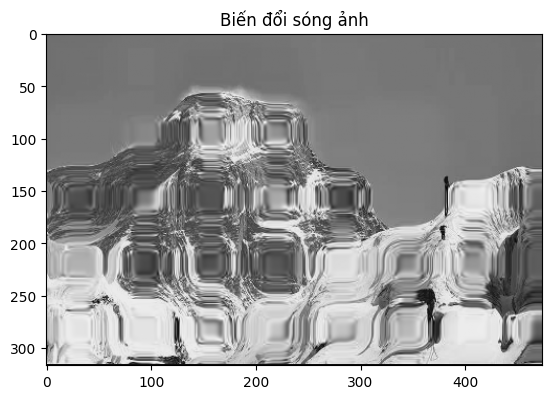

In [7]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def choose_image():
    print("Chọn ảnh để xử lý:")
    print("1. boat.jpg")
    print("2. world_cup.jpg")
    print("3. mountain.jpg")
    choice = input("Nhập lựa chọn (1-3): ")
    if choice == '1':
        return iio.imread("boat.jpg", mode="F"), "boat.jpg"
    elif choice == '2':
        return iio.imread("world_cup.jpg", mode="F"), "world_cup.jpg"
    elif choice == '3':
        return iio.imread("mountain.jpg", mode="F"), "mountain.jpg"
    else:
        print("Lựa chọn không hợp lệ.")
        return None, None

def translate_image(data):
    dx = int(input("Nhập số pixel dịch theo trục X: "))
    dy = int(input("Nhập số pixel dịch theo trục Y: "))
    result = nd.shift(data, (dy, dx))
    return result

def rotate_image(data):
    angle = float(input("Nhập góc xoay (độ): "))
    reshape = input("reshape = True? (y/n): ").lower() == 'y'
    result = nd.rotate(data, angle, reshape=reshape)
    return result

def zoom_image(data):
    zx = float(input("Nhập hệ số zoom theo chiều cao: "))
    zy = float(input("Nhập hệ số zoom theo chiều rộng: "))
    if data.ndim == 3:
        result = nd.zoom(data, (zx, zy, 1))
    else:
        result = nd.zoom(data, (zx, zy))
    return result

def blur_image(data):
    d = float(input("Nhập độ lệch tối đa (d): "))
    if data.ndim != 2:
        print("Ảnh làm mờ yêu cầu ảnh xám (mode='F').")
        return data
    V, H = data.shape
    M = np.indices((V, H))
    q = 2 * d * np.random.rand(*M.shape) - d
    mp = (M + q).astype(int)
    result = nd.map_coordinates(data, mp, order=1, mode='reflect')
    return result

def wave_image(data):
    def GeoFun(outcoord):
        a = 10 * np.sin(outcoord[0] / 10.0) + outcoord[0]
        b = 10 * np.sin(outcoord[1] / 10.0) + outcoord[1]
        return a, b
    result = nd.geometric_transform(data, GeoFun)
    return result

def show_image(data, title):
    plt.imshow(data, cmap='gray' if data.ndim == 2 else None)
    plt.title(title)
    plt.show()

def main():
    while True:
        data, name = choose_image()
        if data is None:
            continue

        print("\nChọn phép biến đổi:")
        print("1. Tịnh tiến")
        print("2. Xoay")
        print("3. Phóng to / Thu nhỏ")
        print("4. Làm mờ")
        print("5. Biến đổi sóng")
        print("0. Thoát")
        choice = input("Nhập lựa chọn: ")

        if choice == '1':
            result = translate_image(data)
            show_image(result, "Tịnh tiến ảnh")
        elif choice == '2':
            result = rotate_image(data)
            show_image(result, "Xoay ảnh")
        elif choice == '3':
            result = zoom_image(data)
            show_image(result, "Phóng to / Thu nhỏ ảnh")
        elif choice == '4':
            result = blur_image(data)
            show_image(result, "Ảnh bị làm mờ")
        elif choice == '5':
            result = wave_image(data)
            show_image(result, "Biến đổi sóng ảnh")
        elif choice == '0':
            print("Thoát chương trình.")
            break
        else:
            print("Lựa chọn không hợp lệ.")

        again = input("\nBạn có muốn xử lý ảnh khác? (y/n): ").lower()
        if again != 'y':
            break

if __name__ == "__main__":
    main()
